In [1]:
import anndata
import itertools
import networkx as nx
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/sclab/mouse/rna_preprocessed.h5ad")
hic = anndata.read_h5ad("/lmh_data/data/sclab/sclab/mouse/hic_preprocessed.h5ad")
graph = nx.read_graphml("/lmh_data/data/sclab/sclab/mouse/prior.graphml.gz")

In [4]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [5]:
scglue.models.configure_dataset(
    hic, "NB", use_highly_variable=True,
    use_rep="X_pca"
)

In [6]:
graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    hic.var.query("highly_variable").index
))

In [7]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "hic": hic}, graph,
    fit_kws={
        "directory": "glue",
#         "max_epochs": 60
    }
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...


[WARNING] SCGLUEModel: It is recommended that `use_rep` dimensionality be equal or larger than `latent_dim`.


[INFO] autodevice: Using GPU 0 as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 20757
[INFO] SCGLUEModel: Setting `max_epochs` = 2886
[INFO] SCGLUEModel: Setting `patience` = 241
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 121
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.551, 'g_kl': 0.002, 'g_elbo': 0.552, 'x_rna_nll': 0.711, 'x_rna_kl': 0.035, 'x_rna_elbo': 0.746, 'x_hic_nll': 2.244, 'x_hic_kl': 0.001, 'x_hic_elbo': 2.245, 'dsc_loss': 0.261, 'vae_loss': 3.012, 'gen_loss': 2.999}, val={'g_nll': 0.557, 'g_kl': 0.002, 'g_elbo': 0.559, 'x_rna_nll': 0.692, 'x_rna_kl': 0.032, 'x_rna_elbo': 0.724, 'x_hic_nll': 2.207, 'x_hic_kl': 0.001, 'x_hic_elbo': 2.208, 'dsc_loss': 0.133, 'vae_loss': 2.954, 'gen_loss': 2.

[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.626, 'g_kl': 0.01, 'g_elbo': 0.635, 'x_rna_nll': 0.594, 'x_rna_kl': 0.019, 'x_rna_elbo': 0.613, 'x_hic_nll': 1.879, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.881, 'dsc_loss': 0.665, 'vae_loss': 2.519, 'gen_loss': 2.486}, val={'g_nll': 0.626, 'g_kl': 0.01, 'g_elbo': 0.635, 'x_rna_nll': 0.592, 'x_rna_kl': 0.018, 'x_rna_elbo': 0.611, 'x_hic_nll': 1.912, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.914, 'dsc_loss': 0.667, 'vae_loss': 2.55, 'gen_loss': 2.517}, 0.7s elapsed
[INFO] SCGLUETrainer: [Epoch 180] train={'g_nll': 0.619, 'g_kl': 0.01, 'g_elbo': 0.629, 'x_rna_nll': 0.598, 'x_rna_kl': 0.02, 'x_rna_elbo': 0.618, 'x_hic_nll': 1.876, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.878, 'dsc_loss': 0.661, 'vae_loss': 2.52, 'gen_loss': 2.487}, val={'g_nll': 0.621, 'g_kl': 0.01, 'g_elbo': 0.631, 'x_rna_nll': 0.592, 'x_rna_kl': 0.019, 'x_rna_elbo': 0.61, 'x_hic_nll': 1.891, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.892, 'dsc_loss': 0.667, 'vae_loss': 2.528, 'gen_loss': 2.494},

[INFO] SCGLUETrainer: [Epoch 330] train={'g_nll': 0.532, 'g_kl': 0.01, 'g_elbo': 0.542, 'x_rna_nll': 0.582, 'x_rna_kl': 0.023, 'x_rna_elbo': 0.606, 'x_hic_nll': 1.866, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.868, 'dsc_loss': 0.666, 'vae_loss': 2.495, 'gen_loss': 2.462}, val={'g_nll': 0.529, 'g_kl': 0.01, 'g_elbo': 0.539, 'x_rna_nll': 0.581, 'x_rna_kl': 0.023, 'x_rna_elbo': 0.603, 'x_hic_nll': 1.898, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.9, 'dsc_loss': 0.634, 'vae_loss': 2.525, 'gen_loss': 2.493}, 0.8s elapsed
[INFO] SCGLUETrainer: [Epoch 340] train={'g_nll': 0.53, 'g_kl': 0.01, 'g_elbo': 0.541, 'x_rna_nll': 0.578, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.602, 'x_hic_nll': 1.86, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.862, 'dsc_loss': 0.672, 'vae_loss': 2.485, 'gen_loss': 2.452}, val={'g_nll': 0.531, 'g_kl': 0.01, 'g_elbo': 0.542, 'x_rna_nll': 0.584, 'x_rna_kl': 0.023, 'x_rna_elbo': 0.606, 'x_hic_nll': 1.894, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.896, 'dsc_loss': 0.632, 'vae_loss': 2.524, 'gen_loss': 2.493},

[INFO] SCGLUETrainer: [Epoch 490] train={'g_nll': 0.522, 'g_kl': 0.01, 'g_elbo': 0.532, 'x_rna_nll': 0.574, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.598, 'x_hic_nll': 1.866, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.868, 'dsc_loss': 0.668, 'vae_loss': 2.488, 'gen_loss': 2.454}, val={'g_nll': 0.526, 'g_kl': 0.01, 'g_elbo': 0.537, 'x_rna_nll': 0.588, 'x_rna_kl': 0.023, 'x_rna_elbo': 0.611, 'x_hic_nll': 1.889, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.891, 'dsc_loss': 0.664, 'vae_loss': 2.523, 'gen_loss': 2.49}, 0.7s elapsed
[INFO] SCGLUETrainer: [Epoch 500] train={'g_nll': 0.524, 'g_kl': 0.01, 'g_elbo': 0.535, 'x_rna_nll': 0.574, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.598, 'x_hic_nll': 1.861, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.863, 'dsc_loss': 0.662, 'vae_loss': 2.482, 'gen_loss': 2.449}, val={'g_nll': 0.524, 'g_kl': 0.01, 'g_elbo': 0.534, 'x_rna_nll': 0.575, 'x_rna_kl': 0.023, 'x_rna_elbo': 0.598, 'x_hic_nll': 1.889, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.891, 'dsc_loss': 0.663, 'vae_loss': 2.51, 'gen_loss': 2.477

[INFO] SCGLUETrainer: [Epoch 650] train={'g_nll': 0.523, 'g_kl': 0.01, 'g_elbo': 0.533, 'x_rna_nll': 0.572, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.596, 'x_hic_nll': 1.867, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.869, 'dsc_loss': 0.667, 'vae_loss': 2.487, 'gen_loss': 2.453}, val={'g_nll': 0.524, 'g_kl': 0.01, 'g_elbo': 0.534, 'x_rna_nll': 0.581, 'x_rna_kl': 0.022, 'x_rna_elbo': 0.604, 'x_hic_nll': 1.895, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.897, 'dsc_loss': 0.661, 'vae_loss': 2.522, 'gen_loss': 2.489}, 0.8s elapsed
[INFO] SCGLUETrainer: [Epoch 660] train={'g_nll': 0.522, 'g_kl': 0.01, 'g_elbo': 0.532, 'x_rna_nll': 0.576, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.6, 'x_hic_nll': 1.857, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.859, 'dsc_loss': 0.669, 'vae_loss': 2.48, 'gen_loss': 2.447}, val={'g_nll': 0.523, 'g_kl': 0.01, 'g_elbo': 0.534, 'x_rna_nll': 0.602, 'x_rna_kl': 0.023, 'x_rna_elbo': 0.625, 'x_hic_nll': 1.905, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.907, 'dsc_loss': 0.645, 'vae_loss': 2.553, 'gen_loss': 2.521}

Epoch 00802: reducing learning rate of group 0 to 2.0000e-08.
Epoch 00802: reducing learning rate of group 0 to 2.0000e-08.
[INFO] LRScheduler: Learning rate reduction: step 5
[INFO] SCGLUETrainer: [Epoch 810] train={'g_nll': 0.523, 'g_kl': 0.01, 'g_elbo': 0.533, 'x_rna_nll': 0.576, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.6, 'x_hic_nll': 1.859, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.862, 'dsc_loss': 0.666, 'vae_loss': 2.483, 'gen_loss': 2.45}, val={'g_nll': 0.52, 'g_kl': 0.01, 'g_elbo': 0.53, 'x_rna_nll': 0.593, 'x_rna_kl': 0.022, 'x_rna_elbo': 0.615, 'x_hic_nll': 1.899, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.901, 'dsc_loss': 0.66, 'vae_loss': 2.538, 'gen_loss': 2.505}, 0.8s elapsed
[INFO] SCGLUETrainer: [Epoch 820] train={'g_nll': 0.522, 'g_kl': 0.01, 'g_elbo': 0.532, 'x_rna_nll': 0.574, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.598, 'x_hic_nll': 1.859, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.861, 'dsc_loss': 0.672, 'vae_loss': 2.48, 'gen_loss': 2.446}, val={'g_nll': 0.521, 'g_kl': 0.01, 'g_elbo': 0.532, 'x_r

2022-11-28 22:05:49,308 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "704"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (11, 11)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...


[WARNING] SCGLUEModel: It is recommended that `use_rep` dimensionality be equal or larger than `latent_dim`.


[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 20757
[INFO] SCGLUEModel: Setting `align_burnin` = 481
[INFO] SCGLUEModel: Setting `max_epochs` = 2886
[INFO] SCGLUEModel: Setting `patience` = 241
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 121
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.531, 'g_kl': 0.01, 'g_elbo': 0.541, 'x_rna_nll': 0.586, 'x_rna_kl': 0.023, 'x_rna_elbo': 0.609, 'x_hic_nll': 1.872, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.874, 'dsc_loss': 0.671, 'vae_loss': 2.505, 'gen_loss': 2.472}, val={'g_nll': 0.528, 'g_kl': 0.01, 'g_elbo': 0.538, 'x_rna_nll': 0.593, 'x_rna_kl': 0.022, 'x_rna_elbo': 0.615, 'x_hic_nll': 1.908, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.91, 'dsc_loss': 0.63, 'vae_loss': 2.546, 'gen_loss': 2.515}, 0.

[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.493, 'g_kl': 0.01, 'g_elbo': 0.503, 'x_rna_nll': 0.58, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.605, 'x_hic_nll': 1.86, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.862, 'dsc_loss': 0.654, 'vae_loss': 2.488, 'gen_loss': 2.455}, val={'g_nll': 0.498, 'g_kl': 0.01, 'g_elbo': 0.508, 'x_rna_nll': 0.604, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.629, 'x_hic_nll': 1.93, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.932, 'dsc_loss': 0.595, 'vae_loss': 2.581, 'gen_loss': 2.552}, 0.8s elapsed
[INFO] SCGLUETrainer: [Epoch 180] train={'g_nll': 0.495, 'g_kl': 0.01, 'g_elbo': 0.505, 'x_rna_nll': 0.58, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.605, 'x_hic_nll': 1.858, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.86, 'dsc_loss': 0.647, 'vae_loss': 2.485, 'gen_loss': 2.453}, val={'g_nll': 0.492, 'g_kl': 0.01, 'g_elbo': 0.502, 'x_rna_nll': 0.598, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.622, 'x_hic_nll': 1.918, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.92, 'dsc_loss': 0.618, 'vae_loss': 2.562, 'gen_loss': 2.532}, 0

[INFO] SCGLUETrainer: [Epoch 340] train={'g_nll': 0.49, 'g_kl': 0.01, 'g_elbo': 0.5, 'x_rna_nll': 0.574, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.6, 'x_hic_nll': 1.867, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.869, 'dsc_loss': 0.634, 'vae_loss': 2.489, 'gen_loss': 2.457}, val={'g_nll': 0.493, 'g_kl': 0.01, 'g_elbo': 0.503, 'x_rna_nll': 0.578, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.603, 'x_hic_nll': 1.917, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.919, 'dsc_loss': 0.59, 'vae_loss': 2.542, 'gen_loss': 2.513}, 0.8s elapsed
[INFO] SCGLUETrainer: [Epoch 350] train={'g_nll': 0.488, 'g_kl': 0.01, 'g_elbo': 0.498, 'x_rna_nll': 0.573, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.599, 'x_hic_nll': 1.869, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.871, 'dsc_loss': 0.613, 'vae_loss': 2.49, 'gen_loss': 2.459}, val={'g_nll': 0.494, 'g_kl': 0.01, 'g_elbo': 0.504, 'x_rna_nll': 0.59, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.616, 'x_hic_nll': 1.919, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.921, 'dsc_loss': 0.594, 'vae_loss': 2.557, 'gen_loss': 2.527}, 0.8

[INFO] SCGLUETrainer: [Epoch 510] train={'g_nll': 0.488, 'g_kl': 0.01, 'g_elbo': 0.498, 'x_rna_nll': 0.574, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.6, 'x_hic_nll': 1.862, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.865, 'dsc_loss': 0.623, 'vae_loss': 2.484, 'gen_loss': 2.453}, val={'g_nll': 0.491, 'g_kl': 0.01, 'g_elbo': 0.501, 'x_rna_nll': 0.586, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.61, 'x_hic_nll': 1.945, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.948, 'dsc_loss': 0.588, 'vae_loss': 2.578, 'gen_loss': 2.548}, 0.8s elapsed
[INFO] SCGLUETrainer: [Epoch 520] train={'g_nll': 0.489, 'g_kl': 0.01, 'g_elbo': 0.499, 'x_rna_nll': 0.576, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.602, 'x_hic_nll': 1.857, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.859, 'dsc_loss': 0.62, 'vae_loss': 2.481, 'gen_loss': 2.45}, val={'g_nll': 0.486, 'g_kl': 0.01, 'g_elbo': 0.496, 'x_rna_nll': 0.573, 'x_rna_kl': 0.024, 'x_rna_elbo': 0.597, 'x_hic_nll': 1.917, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.919, 'dsc_loss': 0.603, 'vae_loss': 2.537, 'gen_loss': 2.507}, 

[INFO] SCGLUETrainer: [Epoch 680] train={'g_nll': 0.49, 'g_kl': 0.01, 'g_elbo': 0.499, 'x_rna_nll': 0.576, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.602, 'x_hic_nll': 1.857, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.859, 'dsc_loss': 0.628, 'vae_loss': 2.481, 'gen_loss': 2.449}, val={'g_nll': 0.49, 'g_kl': 0.01, 'g_elbo': 0.499, 'x_rna_nll': 0.623, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.648, 'x_hic_nll': 1.905, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.907, 'dsc_loss': 0.624, 'vae_loss': 2.575, 'gen_loss': 2.543}, 0.8s elapsed
[INFO] SCGLUETrainer: [Epoch 690] train={'g_nll': 0.491, 'g_kl': 0.01, 'g_elbo': 0.501, 'x_rna_nll': 0.582, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.608, 'x_hic_nll': 1.872, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.874, 'dsc_loss': 0.628, 'vae_loss': 2.502, 'gen_loss': 2.471}, val={'g_nll': 0.494, 'g_kl': 0.01, 'g_elbo': 0.504, 'x_rna_nll': 0.611, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.636, 'x_hic_nll': 1.916, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.919, 'dsc_loss': 0.633, 'vae_loss': 2.575, 'gen_loss': 2.543

[INFO] SCGLUETrainer: [Epoch 840] train={'g_nll': 0.487, 'g_kl': 0.01, 'g_elbo': 0.496, 'x_rna_nll': 0.568, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.595, 'x_hic_nll': 1.855, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.857, 'dsc_loss': 0.647, 'vae_loss': 2.472, 'gen_loss': 2.439}, val={'g_nll': 0.488, 'g_kl': 0.01, 'g_elbo': 0.498, 'x_rna_nll': 0.582, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.608, 'x_hic_nll': 1.916, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.918, 'dsc_loss': 0.601, 'vae_loss': 2.546, 'gen_loss': 2.516}, 0.8s elapsed
Epoch 00840: reducing learning rate of group 0 to 2.0000e-05.
Epoch 00840: reducing learning rate of group 0 to 2.0000e-05.
[INFO] LRScheduler: Learning rate reduction: step 2
[INFO] SCGLUETrainer: [Epoch 850] train={'g_nll': 0.489, 'g_kl': 0.01, 'g_elbo': 0.498, 'x_rna_nll': 0.568, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.594, 'x_hic_nll': 1.859, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.861, 'dsc_loss': 0.64, 'vae_loss': 2.475, 'gen_loss': 2.443}, val={'g_nll': 0.489, 'g_kl': 0.01, 'g_elbo': 0.499

[INFO] SCGLUETrainer: [Epoch 1000] train={'g_nll': 0.488, 'g_kl': 0.01, 'g_elbo': 0.498, 'x_rna_nll': 0.564, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.591, 'x_hic_nll': 1.86, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.862, 'dsc_loss': 0.626, 'vae_loss': 2.472, 'gen_loss': 2.441}, val={'g_nll': 0.488, 'g_kl': 0.01, 'g_elbo': 0.498, 'x_rna_nll': 0.616, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.642, 'x_hic_nll': 1.92, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.923, 'dsc_loss': 0.616, 'vae_loss': 2.584, 'gen_loss': 2.553}, 0.8s elapsed
[INFO] SCGLUETrainer: [Epoch 1010] train={'g_nll': 0.489, 'g_kl': 0.01, 'g_elbo': 0.498, 'x_rna_nll': 0.571, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.597, 'x_hic_nll': 1.869, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.871, 'dsc_loss': 0.611, 'vae_loss': 2.488, 'gen_loss': 2.458}, val={'g_nll': 0.489, 'g_kl': 0.01, 'g_elbo': 0.498, 'x_rna_nll': 0.604, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.628, 'x_hic_nll': 1.935, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.937, 'dsc_loss': 0.585, 'vae_loss': 2.585, 'gen_loss': 2.5

[INFO] SCGLUETrainer: [Epoch 1170] train={'g_nll': 0.489, 'g_kl': 0.01, 'g_elbo': 0.498, 'x_rna_nll': 0.567, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.593, 'x_hic_nll': 1.854, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.857, 'dsc_loss': 0.619, 'vae_loss': 2.469, 'gen_loss': 2.438}, val={'g_nll': 0.49, 'g_kl': 0.01, 'g_elbo': 0.499, 'x_rna_nll': 0.601, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.626, 'x_hic_nll': 1.913, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.916, 'dsc_loss': 0.594, 'vae_loss': 2.561, 'gen_loss': 2.532}, 0.8s elapsed
[INFO] SCGLUETrainer: [Epoch 1180] train={'g_nll': 0.487, 'g_kl': 0.01, 'g_elbo': 0.497, 'x_rna_nll': 0.57, 'x_rna_kl': 0.026, 'x_rna_elbo': 0.596, 'x_hic_nll': 1.86, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.862, 'dsc_loss': 0.633, 'vae_loss': 2.479, 'gen_loss': 2.447}, val={'g_nll': 0.487, 'g_kl': 0.01, 'g_elbo': 0.496, 'x_rna_nll': 0.614, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.639, 'x_hic_nll': 1.913, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.915, 'dsc_loss': 0.608, 'vae_loss': 2.574, 'gen_loss': 2.54

2022-11-28 22:25:11,098 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "1073"...


In [8]:
glue.save("/lmh_data/data/sclab/sclab/glue.dill")

In [9]:
# dx = scglue.models.integration_consistency(
#     glue, {"rna": rna, "hic": hic}, graph,
#     count_layers={"rna": "counts"}
# )
# dx

In [10]:
# _ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

In [11]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
hic.obsm["X_glue"] = glue.encode_data("hic", hic)

combined = anndata.concat([rna, hic])

/root/miniconda3/envs/see/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/miniconda3/envs/see/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


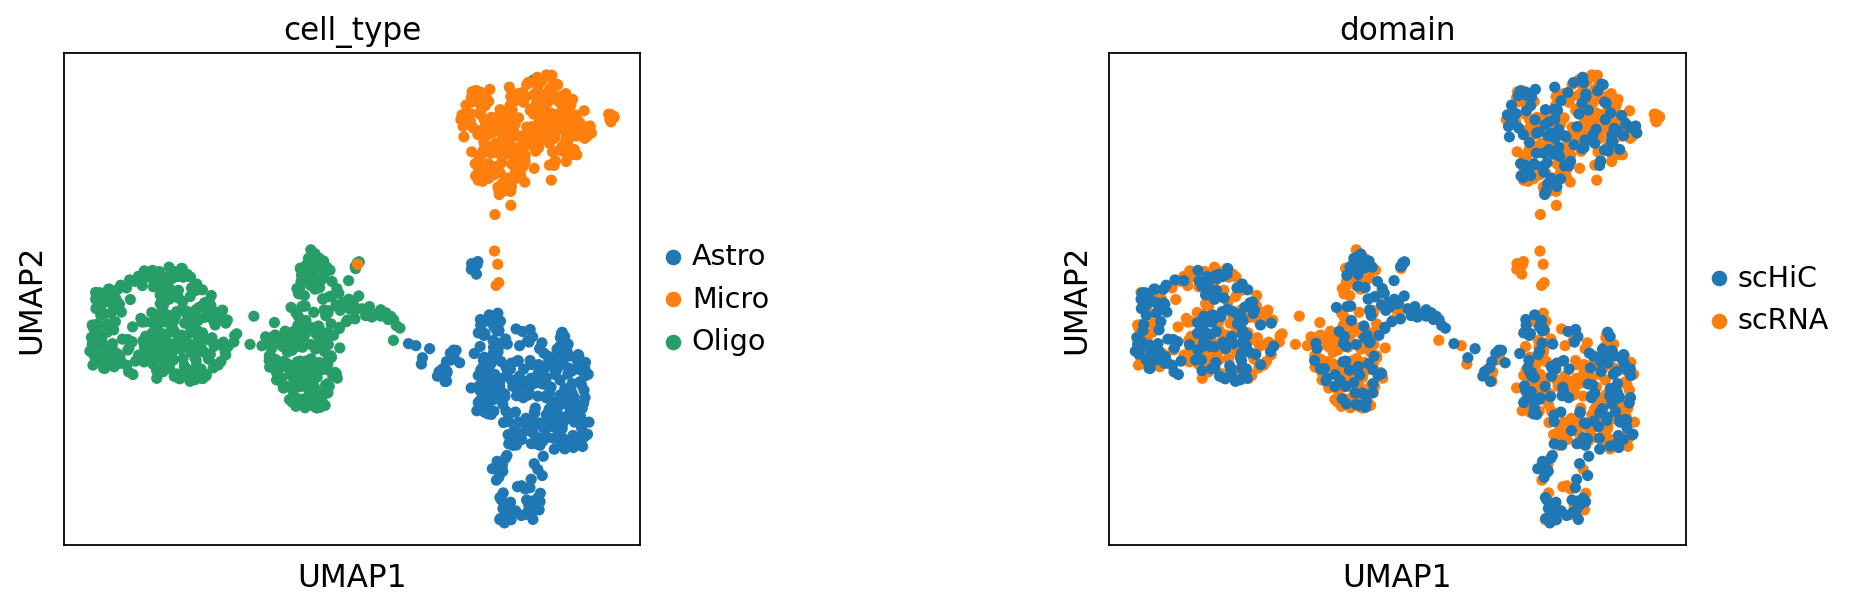

In [12]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)

/root/miniconda3/envs/see/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(
/root/miniconda3/envs/see/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


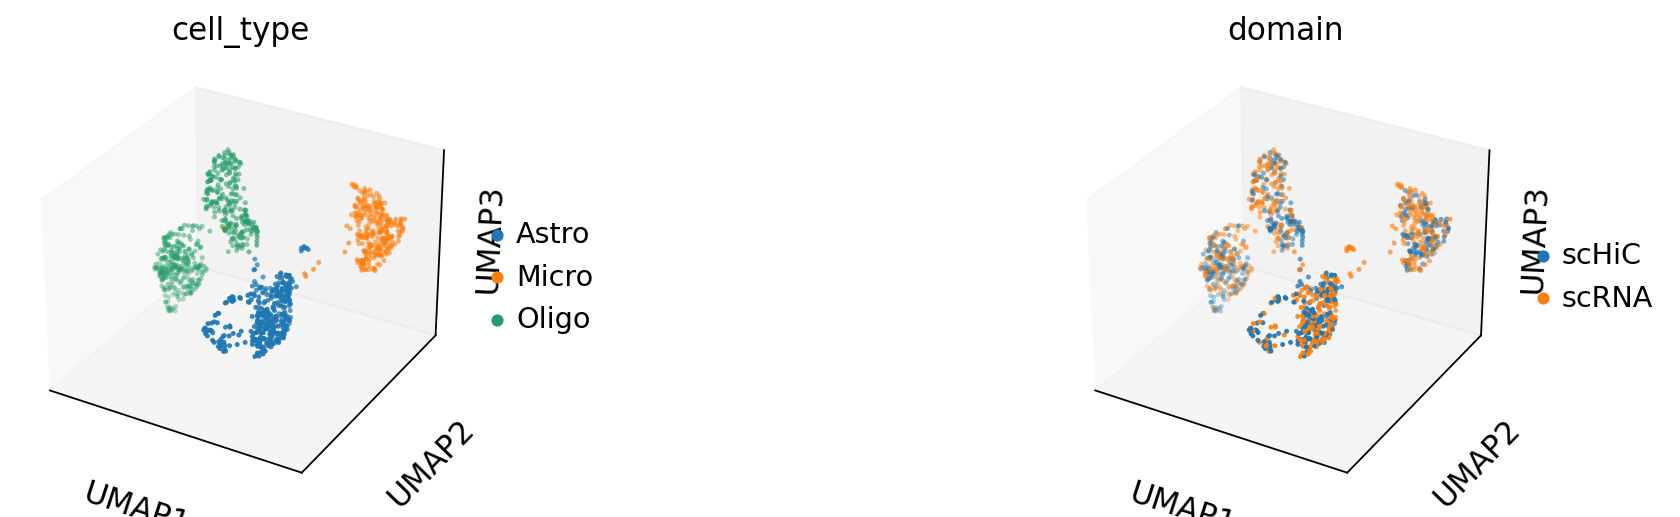

In [13]:
sc.tl.umap(combined, n_components=3)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65, projection='3d')

<IPython.core.display.Javascript object>


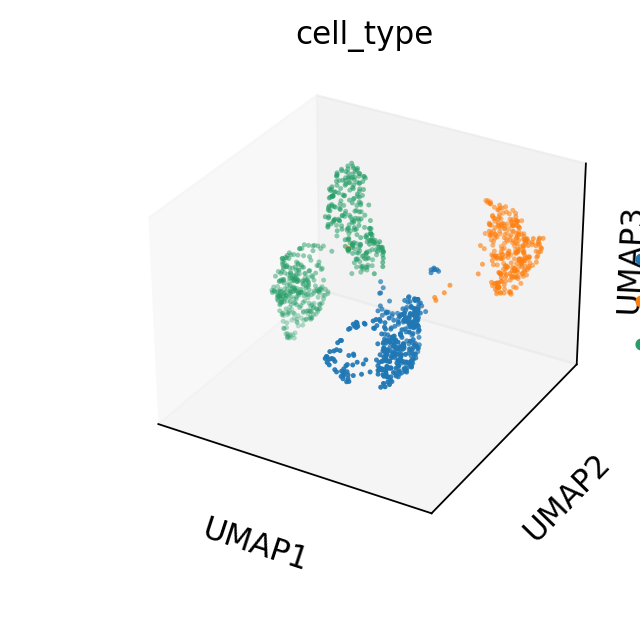

/root/miniconda3/envs/see/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


In [14]:
%matplotlib notebook
sc.pl.umap(combined, color=["cell_type"], projection='3d')

In [15]:
rna.write("/lmh_data/data/sclab/sclab/mouse/rna_result.h5ad", compression="gzip")
hic.write("/lmh_data/data/sclab/sclab/mouse/hic_result.h5ad", compression="gzip")